# Claim to support / refute:

#### - “Security   breaches   do   mostly   occur   in   less-tech-savvy   organizations”

https://public.tableau.com/profile/melvin7659#!/vizhome/Mel_Lab2/ofSavyNonSavyDataBreaches

## Organizing the Data

In [2]:
# Imports

import pandas as pd
import xlrd as xl

In [3]:
# Load data into Excel file
data = pd.ExcelFile("/Users/melvinchow/Documents/SCU/2017_Fall/MSIS 2629 Dashboards Visualizations/Lab2/Information is Beautiful- Data Breaches (public).xlsx")

In [4]:
# See sheet names in excel file
data.sheet_names

[u'2017 update', u'Jan 2015 update', u'July 2013 update (old)']

In [5]:
# Load first sheet into dataframe

DF = data.parse('2017 update')

In [6]:
# Preview data columns
DF.columns

Index([              u'Entity',     u'alternative name',
                      u'story',                 u'YEAR',
               u'records lost',         u'ORGANISATION',
             u'METHOD OF LEAK',    u'interesting story',
       u'NO OF RECORDS STOLEN',     u'DATA SENSITIVITY',
                     u'UNUSED',             u'UNUSED.1',
                    u'Exclude',          u'Unnamed: 13',
            u'1st source link',      u'2nd source link',
                 u'3rd source',          u'source name'],
      dtype='object')

In [7]:
# Remove unnecessary columns

StripCols = DF[["Entity", "YEAR", "records lost", "ORGANISATION", "METHOD OF LEAK", "DATA SENSITIVITY"]]
StripCols.head()

,Entity,YEAR,records lost,ORGANISATION,METHOD OF LEAK,DATA SENSITIVITY
0,NaN,"years are encoded (0=2004, 8 = 2012, 9 = 2013,...","(use 3m, 4m, 5m or 10m to approximate unknown ...",NaN,NaN,1. Just email address/Online information 20 SS...
1,AOL,0,92000000,web,inside job,1
2,Automatic Data Processing,1,125000,financial,poor security,20
3,Ameritrade Inc.,1,200000,financial,lost / stolen device,20
4,Citigroup,1,3900000,financial,lost / stolen device,300


In [8]:
# remove first row with NaN values

cleaned = StripCols.dropna()
cleaned.head()

,Entity,YEAR,records lost,ORGANISATION,METHOD OF LEAK,DATA SENSITIVITY
1,AOL,0,92000000,web,inside job,1
2,Automatic Data Processing,1,125000,financial,poor security,20
3,Ameritrade Inc.,1,200000,financial,lost / stolen device,20
4,Citigroup,1,3900000,financial,lost / stolen device,300
5,Cardsystems Solutions Inc.,1,40000000,financial,hacked,300


In [9]:
# Convert YEAR values to real years

cleaned['YEAR'].astype(int)   # Convert data type
cleaned2 = cleaned.copy()
cleaned2['Real Year'] = cleaned['YEAR'] + 2004

cleaned3 = cleaned2[["Entity", "Real Year", "records lost", "ORGANISATION", "METHOD OF LEAK", "DATA SENSITIVITY"]]
cleaned3.tail()


,Entity,Real Year,records lost,ORGANISATION,METHOD OF LEAK,DATA SENSITIVITY
249,CEX,2018,2000000,retail,accidentally published,300
250,Swedish Transport Agency,2018,3000000,government,poor security,50000
251,Instagram,2018,6000000,web,hacked,1
252,Equifax,2018,143000000,financial,hacked,50000
253,Spambot,2018,711000000,web,poor security,4000


### Some data in various rows had errors and need altering for consistency:

In [10]:
# Change 2018 to 2017

cleaned4 = cleaned3.copy()
cleaned4.loc[cleaned3['Real Year'] > 2017, 'Real Year'] = 2017
cleaned4.tail()

,Entity,Real Year,records lost,ORGANISATION,METHOD OF LEAK,DATA SENSITIVITY
249,CEX,2017,2000000,retail,accidentally published,300
250,Swedish Transport Agency,2017,3000000,government,poor security,50000
251,Instagram,2017,6000000,web,hacked,1
252,Equifax,2017,143000000,financial,hacked,50000
253,Spambot,2017,711000000,web,poor security,4000


In [11]:
# Change "web, tech" to "tech, web" organisation category

cleaned5 = cleaned4.copy()
cleaned5.loc[cleaned4['ORGANISATION'] == 'web, tech', 'ORGANISATION'] = 'tech, web'

# Change one occurence of data sensitivity "3" to "300"

cleaned6 = cleaned5.copy()
cleaned6.loc[cleaned5['DATA SENSITIVITY'] == 3, 'DATA SENSITIVITY'] = 300

### Each organization type split into one of two Tech Saviness Categories:

In [12]:
# show all types of organizations listed:

cleaned6.ORGANISATION.unique()

array([u'web', u'financial', u'tech, retail', u'telecoms',
       u'government, military', u'government', u'retail', u'academic',
       u'energy', u'military', u'healthcare', u'tech',
       u'government, healthcare', u'web, gaming', u'gaming', u'media',
       u'military, healthcare', u'web, military', u'tech, web',
       u'transport', u'legal', u'app'], dtype=object)

In [13]:
# Make new column "Tech Saviness", categorize accordingly
cleaned6["Tech Saviness"] = "New"

cleaned6["Tech Saviness"][cleaned6["ORGANISATION"] == "web"] = "Savy"
cleaned6["Tech Saviness"][cleaned6["ORGANISATION"] == "financial"] = "Savy"
cleaned6["Tech Saviness"][cleaned6["ORGANISATION"] == "telecoms"] = "Savy"
cleaned6["Tech Saviness"][cleaned6["ORGANISATION"] == "tech"] = "Savy"
cleaned6["Tech Saviness"][cleaned6["ORGANISATION"] == "web, gaming"] = "Savy"
cleaned6["Tech Saviness"][cleaned6["ORGANISATION"] == "gaming"] = "Savy"
cleaned6["Tech Saviness"][cleaned6["ORGANISATION"] == "web, military"] = "Savy"
cleaned6["Tech Saviness"][cleaned6["ORGANISATION"] == "tech, web"] = "Savy"
cleaned6["Tech Saviness"][cleaned6["ORGANISATION"] == "app"] = "Savy"
cleaned6["Tech Saviness"][cleaned6["ORGANISATION"] == "tech, retail"] = "Savy"

cleaned6["Tech Saviness"][cleaned6["ORGANISATION"] == "government, military"] = "NonSavy"
cleaned6["Tech Saviness"][cleaned6["ORGANISATION"] == "government"] = "NonSavy"
cleaned6["Tech Saviness"][cleaned6["ORGANISATION"] == "retail"] = "NonSavy"
cleaned6["Tech Saviness"][cleaned6["ORGANISATION"] == "academic"] = "NonSavy"
cleaned6["Tech Saviness"][cleaned6["ORGANISATION"] == "energy"] = "NonSavy"
cleaned6["Tech Saviness"][cleaned6["ORGANISATION"] == "military"] = "NonSavy"
cleaned6["Tech Saviness"][cleaned6["ORGANISATION"] == "healthcare"] = "NonSavy"
cleaned6["Tech Saviness"][cleaned6["ORGANISATION"] == "government, healthcare"] = "NonSavy"
cleaned6["Tech Saviness"][cleaned6["ORGANISATION"] == "media"] = "NonSavy"
cleaned6["Tech Saviness"][cleaned6["ORGANISATION"] == "military, healthcare"] = "NonSavy"
cleaned6["Tech Saviness"][cleaned6["ORGANISATION"] == "transport"] = "NonSavy"
cleaned6["Tech Saviness"][cleaned6["ORGANISATION"] == "legal"] = "NonSavy"

In [14]:
cleaned6.head()

,Entity,Real Year,records lost,ORGANISATION,METHOD OF LEAK,DATA SENSITIVITY,Tech Saviness
1,AOL,2004,92000000,web,inside job,1,Savy
2,Automatic Data Processing,2005,125000,financial,poor security,20,Savy
3,Ameritrade Inc.,2005,200000,financial,lost / stolen device,20,Savy
4,Citigroup,2005,3900000,financial,lost / stolen device,300,Savy
5,Cardsystems Solutions Inc.,2005,40000000,financial,hacked,300,Savy


In [15]:
# Export to CSV

cleaned6.to_csv("DataBreaches.csv", header=True, encoding='utf-8')

# Preliminary Visuals

#### The below visual provides lots of detailed information, but ultimately looks messy and hard to read.  It also requires the viewer to decide for himself what organization categories are tech savy or not, and then aggregate with math to answer the question.  My next attempt will be more simplified.

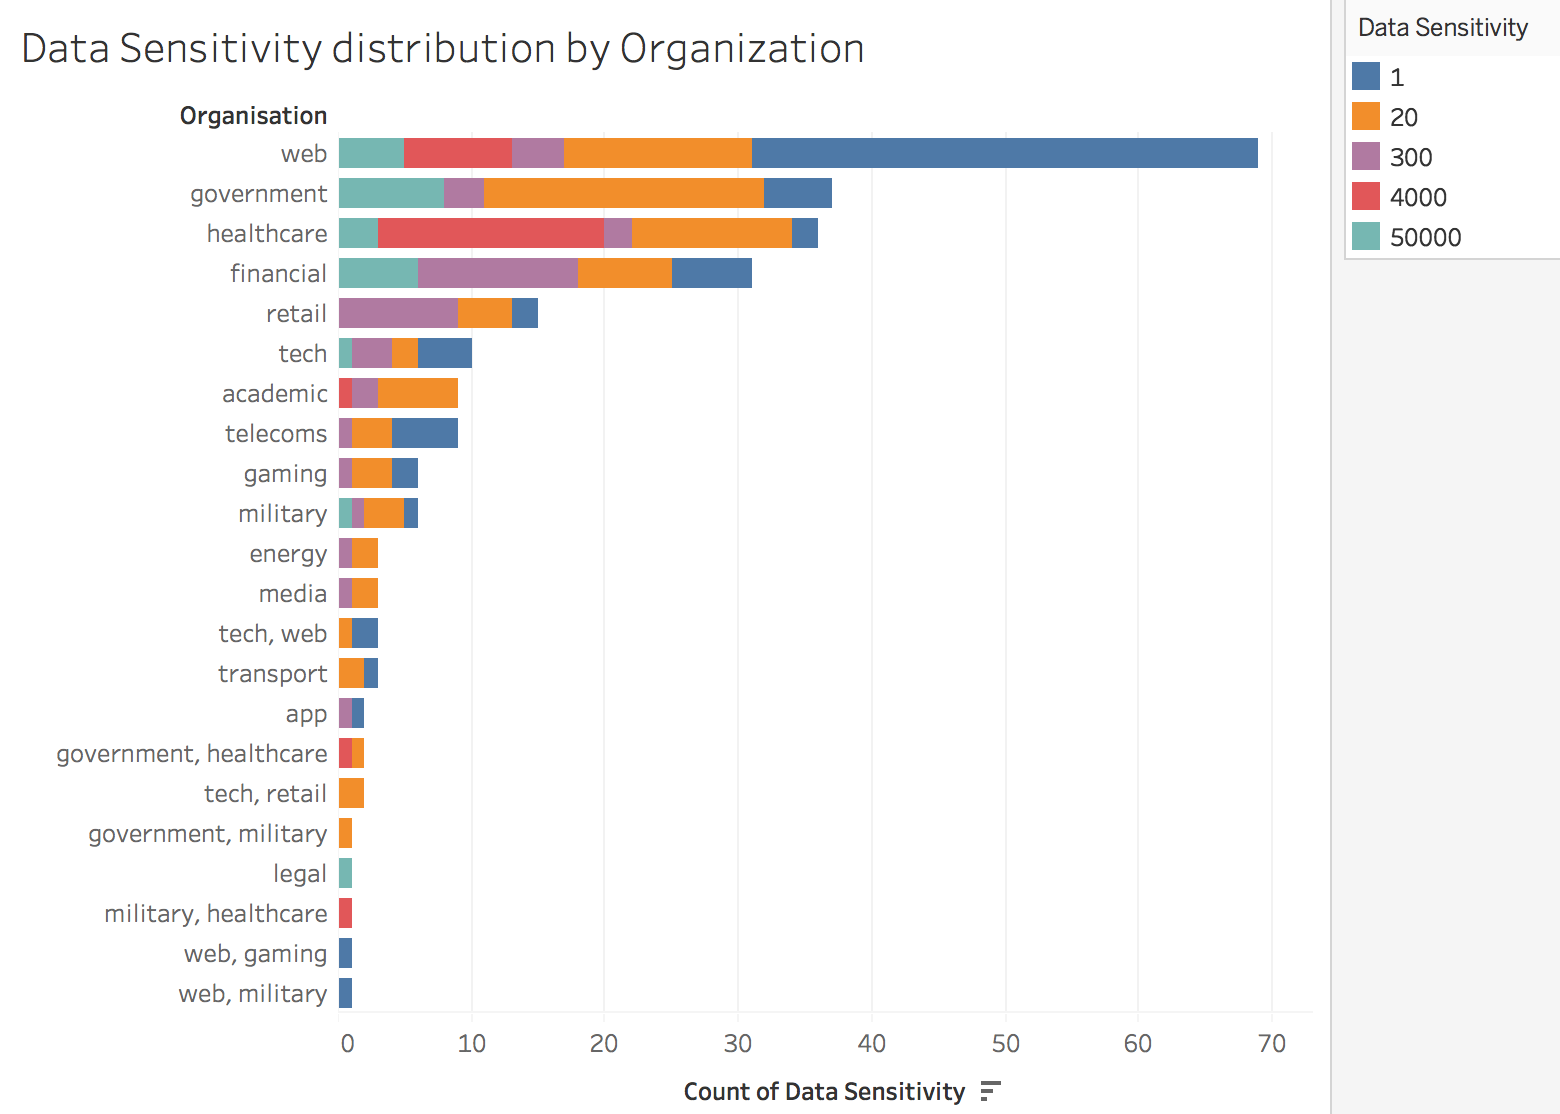

In [20]:
from IPython.core.display import Image 
Image(filename='/Users/melvinchow/Desktop/lab2_proto1.png')

#### This visual shows, among the most famous data breaches, the ratios of organization types that account for each data sensitivity threat level.  Shows that non-tech-savy companies are more prone to theft of data that is more sensitive than level 1, but doesn't show how many of each company saviness level has had data stolen.

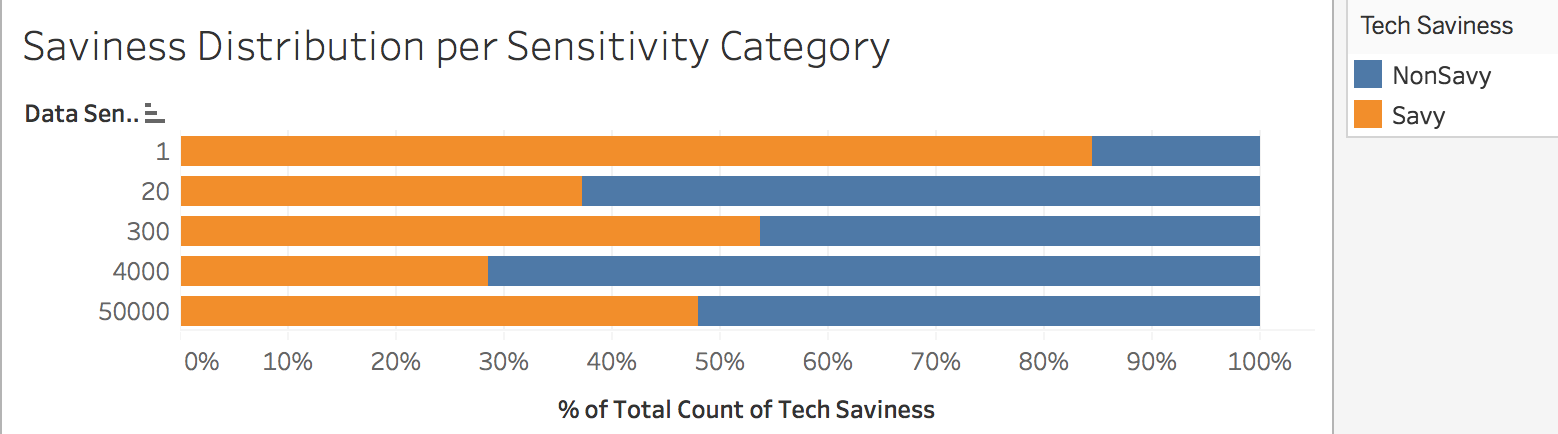

In [24]:
from IPython.core.display import Image 
Image(filename='/Users/melvinchow/Desktop/lab2_proto2.png')

# Conclusion

### Tech savy companies see more data breaches than non-savy companies, refuting the  claim that data breaches happen more often to non-savy companies.

##### <i> (Given that the organizations I have decided are tech-savy or non-savy is agreed upon by the viewers) </i>

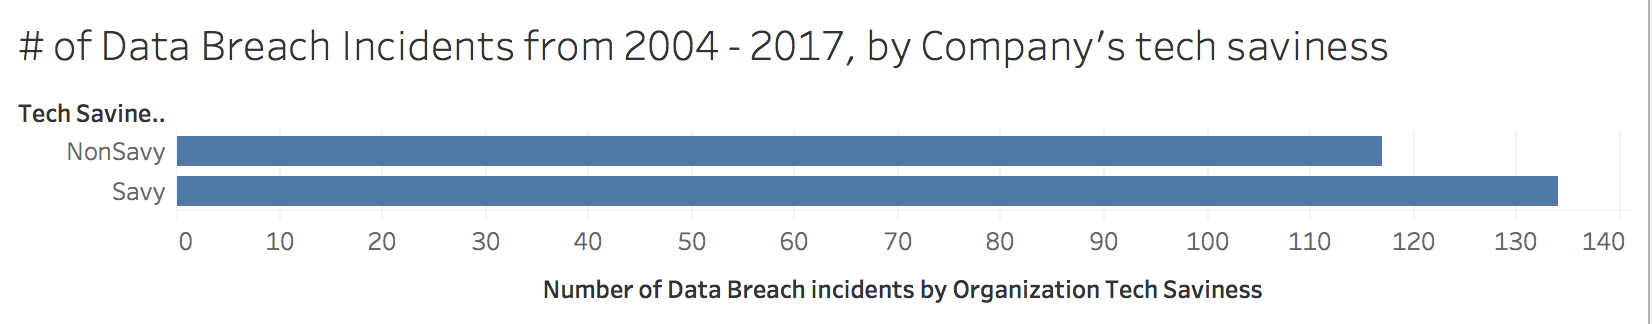

In [21]:
Image(filename='/Users/melvinchow/Desktop/lab2_1.png')

### However non-savy companies seem more vulnerable to theft of sensitive data compared to their tech-savy counterparts

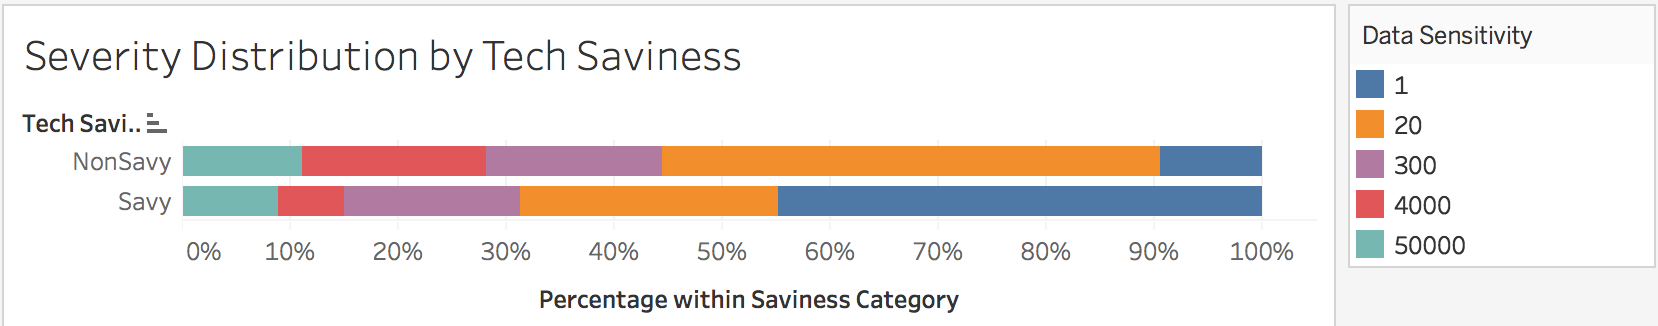

In [22]:
Image(filename='/Users/melvinchow/Desktop/lab2_3.png')